# Generalized IF model

Choose parameters fit for <hyperpolarization_induced_bursting> mode


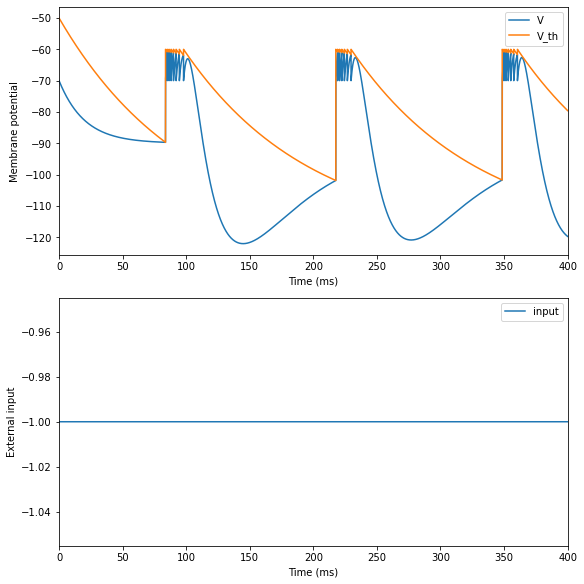

In [2]:
import matplotlib.pyplot as plt
import brainpy as bp
import bpmodels
from bpmodels.neurons import get_GeneralizedIF

## set global params
dt = 0.02  # update variables per <dt> ms
duration = 200.  # simulate duration
bp.profile.set(backend="numba", dt=dt, merge_steps=True)

# define neuron type
GIF_neuron = get_GeneralizedIF(noise=1.)

# build neuron group
neu = bp.NeuGroup(GIF_neuron, geometry=(10,), monitors=['V', 'V_th', 'input'])
neu.runner.set_schedule(['input', 'update', 'monitor', 'reset'])
    
# simulate
mode = "hyperpolarization_induced_bursting"
print(f"Choose parameters fit for <{mode}> mode")
if mode == 'tonic_spiking':
    neu.run(duration=duration, inputs=["ST.input", 1.5], report=False)
elif mode == "class_1":
    neu.run(duration=500., inputs=["ST.input", 1. + 1e-6], report=False)
elif mode == "spike_frequency_adaptation":
    neu.pars['a'] = 0.005
    neu.run(duration = duration, inputs = ["ST.input", 2.], report=False)
elif mode == "phasic_spiking":
    neu.pars['a'] = 0.005
    neu.run(duration = 500., inputs = ["ST.input", 1.5], report=False)
elif mode == "accomodation":
    neu.pars['a'] = 0.005
    I_ext, dur = bp.inputs.constant_current([(1.5, 100.), (0, 500.), (0.5, 100.), 
                                             (1., 100.), (1.5, 100.), (0., 100.)])
    neu.run(duration = dur, inputs = ["ST.input", I_ext], report=False)
elif mode == "threshold_variability":
    neu.pars['a'] = 0.005
    I_ext, dur = bp.inputs.constant_current(
                     [(1.5, 20.), (0., 180.), (-1.5, 20.), 
                      (0., 20.), (1.5, 20.), (0., 140.)])
    neu.run(duration = dur, inputs = ["ST.input", I_ext], report=False)
elif mode == "rebound spike":
    neu.pars['a'] = 0.005
    I_ext, dur = bp.inputs.constant_current(
                     [(0, 50.), (-3.5, 750.), (0., 200.)])
    neu.run(duration = dur, inputs = ["ST.input", I_ext], report=False)
elif mode == "class_2":
    neu.pars['a'] = 0.005
    neu.ST['V_th'] = -30.
    neu.run(duration = duration, inputs = ["ST.input", 2 * (1. + 1e-6)], report=False)
elif mode == "integrator":
    neu.pars['a'] = 0.005
    I_ext, dur = bp.inputs.constant_current(
                    [(1.5, 20.), (0., 10.), (1.5, 20.), (0., 250.),
                     (1.5, 20.), (0., 30.), (1.5, 20.), (0., 30.)])
    neu.run(duration = dur, inputs = ["ST.input", I_ext], report=False)
elif mode == "input_bistability":
    neu.pars['a'] = 0.005
    I_ext, dur = bp.inputs.constant_current(
                     [(1.5, 100.), (1.7, 400.), 
                      (1.5, 100.), (1.7, 400.)])
    neu.run(duration = dur, inputs = ["ST.input", I_ext], report=False)
elif mode == "hyperpolarization_induced_spiking":
    neu.ST['V_th'] = -50.
    neu.pars['V_th_reset'] = -60.
    neu.pars['V_th_inf'] = -120.
    neu.run(duration = 400., inputs = ["ST.input", -1.], report=False)
elif mode == "hyperpolarization_induced_bursting":
    neu.ST['V_th'] = -50.
    neu.pars['V_th_reset'] = -60.
    neu.pars['V_th_inf'] = -120.
    neu.pars['A1'] = 10 
    neu.pars['A2'] = -0.6
    neu.run(duration = 400., inputs = ["ST.input", -1.], report=False)
elif mode == "tonic_bursting":
    neu.pars['a'] = 0.005
    neu.pars['A1'] = 10
    neu.pars['A2'] = -0.6
    neu.run(duration = 500., inputs = ["ST.input", 2.], report=False)
elif mode == "phasic_bursting":
    neu.pars['a'] = 0.005
    neu.pars['A1'] = 10
    neu.pars['A2'] = -0.6
    neu.run(duration = 500., inputs = ["ST.input", 1.5], report=False)
elif mode == "rebound_burst":
    neu.pars['a'] = 0.005
    neu.pars['A1'] = 10
    neu.pars['A2'] = -0.6
    I_ext, dur = bp.inputs.constant_current(
                     [(0, 100.), (-3.5, 500.), (0., 400.)])
    neu.run(duration = dur, inputs = ["ST.input", I_ext], report=False)
elif mode == "mixed_mode":
    neu.pars['a'] = 0.005
    neu.pars['A1'] = 5
    neu.pars['A2'] = -0.3
    neu.run(duration = 500., inputs = ["ST.input", 2.], report=False)
elif mode == "afterpotentials":
    neu.pars['a'] = 0.005
    neu.pars['A1'] = 5
    neu.pars['A2'] = -0.3
    I_ext, dur = bp.inputs.constant_current(
                     [(2., 15.), (0, 185.)])
    neu.run(duration = dur, inputs = ["ST.input", I_ext], report=False)
elif mode == "basal_bistability":
    neu.pars['A1'] = 8
    neu.pars['A2'] = -0.1
    I_ext, dur = bp.inputs.constant_current(
                     [(5., 10.), (0., 90.), (5., 10.), (0., 90.)])
    neu.run(duration = dur, inputs = ["ST.input", I_ext], report=False)
elif mode == "preferred_frequency":
    neu.pars['a'] = 0.005
    neu.pars['A1'] = -3
    neu.pars['A2'] = 0.5
    I_ext, dur = bp.inputs.constant_current(
                     [(5., 10.), (0., 10.), (4., 10.), (0., 370.), 
                      (5., 10.), (0., 90.), (4., 10.), (0., 290.)])
    neu.run(duration = dur, inputs = ["ST.input", I_ext], report=False)
elif mode == "spike_latency":
    neu.pars['a'] = -0.08
    I_ext, dur = bp.inputs.constant_current(
                    [(8., 2.), (0, 48.)])
    neu.run(duration = dur, inputs = ["ST.input", I_ext], report=False)
else:
    raise ValueError(f"Error: Mode {mode} is not supported!")

# paint
ts = neu.mon.ts
fig, gs = bp.visualize.get_figure(2, 1, 4, 8)
fig.add_subplot(gs[0, 0])
plt.plot(ts, neu.mon.V[:, 0], label='V')
plt.plot(ts, neu.mon.V_th[:, 0], label='V_th')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential')
plt.xlim(-0.1, ts[-1] + 0.1)
plt.legend()

# paint
fig.add_subplot(gs[1, 0])
plt.plot(ts, neu.mon.input[:, 0], label='input')
plt.xlabel('Time (ms)')
plt.ylabel('External input')
plt.xlim(-0.1, ts[-1] + 0.1)
plt.legend()

plt.show()